# Titanic Data Analysis

## Author : Shilpa Madini

### About the data
*This information is obtained from [Kaggle](https://www.kaggle.com/c/titanic)*

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15,1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 our of 2224 passenders and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.



#### Data Dictionary

|Variable      | Definition           | Key                                         |
|------------- |:--------------------:| -------------------------------------------:|
|survival      | Survival             | 0 = No, 1 = Yes                             |
|pclass        | Ticket class         | 1 = 1st, 2 = 2nd, 3 = 3rd                   |
|sex           | Sex                  |                                             |
|Age           | Age in years         |                                             |
|sibsp         | # of siblings/spouses|                                             |
|parch         | # of parents/children|                                             |
|ticket        | Ticket number        |                                             |
|fare          | Passenger fare       |                                             |
|cabin         | Cabin number         |                                             |
|embarked      | Port of embarkation  |C = Cherburg, Q = Queenstown, S = Southampton|

#### Variable Notes:
    
   pclass: A proxy for socio-economic status (SES)
   
   1st = Upper**
  
   2nd = Middle
   
   3rd = Lower

   age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

   sibsp: The dataset defines family relations in this way...
   Sibling = brother, sister, stepbrother, stepsister
   Spouse = husband, wife (mistresses and fiancés were ignored)

   parch: The dataset defines family relations in this way...
   Parent = mother, father
   Child = daughter, son, stepdaughter, stepson
   Some children travelled only with a nanny, therefore parch=0 for them.


### Objective: 

  Determine what factors made passengers more likely to survive?


### Data exploration and wrangling

In [115]:
# import modules for NumPy, Pandas, Matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
sns.set(color_codes=True)

In [116]:
# read data from the file into pandas dataframe
file_name = '/Users/shilpamadini/Desktop/titanic/titanic_data.csv'
titanic_df = pd.read_csv(file_name)

In [117]:
# display top 3 rows from titanic data frame
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
# determine if there are any NaN in the data frame
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [119]:
# determine if there are any NaN in the data frame
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
# rows with null value for Embarked column
titanic_df[pd.isnull(titanic_df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [189]:
# rows with null value for Age column
#titanic_df[pd.isnull(titanic_df['Age'])]

In [122]:
# describe the data types for each column
print titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Survived column has numerical integer values as 1, 0. For better readability purposes,updating the 1 and 0 to YES and NO.**


In [123]:
# function to return YES/NO values for 1/0
def update_survived(val):
    if val == 0:
        return 'NO'
    else:
        return 'YES'

In [124]:
# applying update_survived function on the Survied column in titanic_df
titanic_df['Survived'] = titanic_df['Survived'].apply(update_survived)
# display top few rows in titanic_df after updating Survived column.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NO,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,YES,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,YES,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,YES,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,NO,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Embarked column has city names represented as codes of  'S','C','Q'. It also has 'NAN' populated  wherever data is not available. Ignoring the NAN in this column and updating each code with the corresponding city name.** 

In [125]:
# function to return city name for city codes
def update_embarked(val):
    if val == 'C':
        return 'Cherburg'
    elif val == 'Q':
        return 'Queenstown'
    elif val == 'S':
        return 'Southampton'

In [126]:
# apply update_embarked function on Embarked column in titanic_df
titanic_df['Embarked'] = titanic_df['Embarked'].apply(update_embarked)
# display top few rows in the updated dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,NO,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,YES,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherburg
2,3,YES,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,YES,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,NO,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [127]:
# group the passengers based on survival
titanic_count_survived = titanic_df.groupby('Survived',as_index=False)

In [128]:
# count of PassengerId grouped by Survided
titanic_count_survived = titanic_count_survived['PassengerId'].count()
titanic_count_survived

,Survived,PassengerId
0,NO,549
1,YES,342


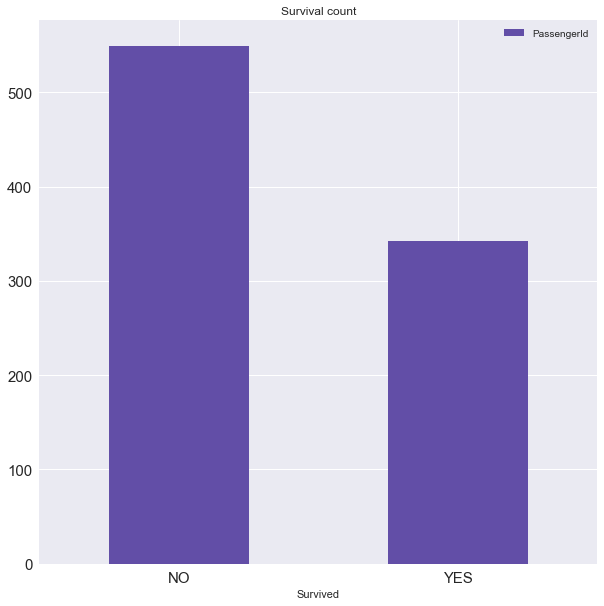

In [129]:
# plot a bar chart for survival counts
titanic_count_survived.plot(x = 'Survived',y ='PassengerId',kind= 'bar',title='Survival count',rot = 0,color = '#624ea7',figsize=(10,10),fontsize=15)
plt.show()

**Key Observation 1 :**
       
       Total number of passengers survived : 342

       Total number of passengers not survived : 549

In [130]:
# group the passengers by survival and Pclass and count the number of passengers for each group
titanic_count_survived_pclass = titanic_df.groupby(['Survived','Pclass'])['PassengerId'].count().unstack()
titanic_count_survived_pclass


Pclass,1,2,3
Survived,,,
NO,80,97,372
YES,136,87,119


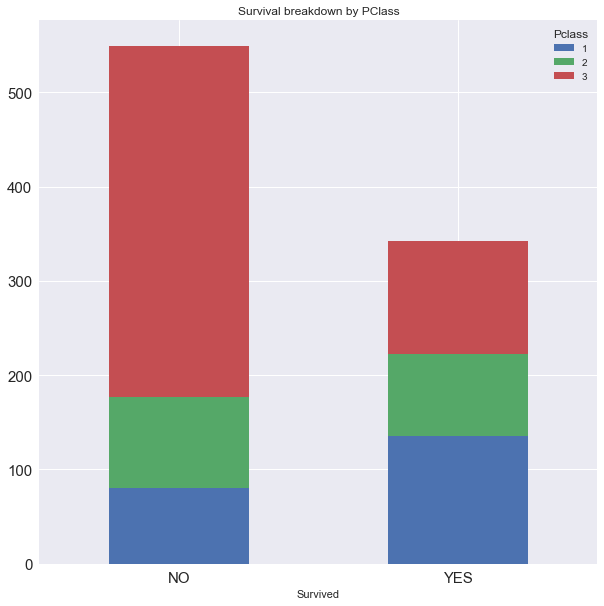

In [131]:
# plot a stacked bar chart for the count of passengers survived or not survived broken down for each PClass
titanic_count_survived_pclass.plot(kind='bar',stacked=True,title='Survival breakdown by PClass',rot = 0,figsize=(10,10),fontsize=15)
plt.show()

**Total survived passengers :**

                    Pclass 1 : 136
                    
                    Pclass 2 : 87
                    
                    Pclass 3 : 119

**Total not survived Passengers:**

                    Pclass 1 : 80
                    
                    Pclass 2 : 97
                    
                    Pclass 3 : 372
                    
**Key Observation 2 :**

                Passengers in PClass 1 has better survival than Passengers Pclass 2 and Pclass3 
                Pclass3 passengers have the lowest survival.

In [132]:
# group the passengers by survival and Pclass and count the number of passengers for each group
titanic_count_survived_pclass_gender = titanic_df.groupby(['Survived','Pclass','Sex'])['PassengerId'].count().unstack()

In [133]:
# print number of passenger grouped by survival , PClass and gender
titanic_count_survived_pclass_gender

Sex              female  male
Survived Pclass              
NO       1            3    77
         2            6    91
         3           72   300
YES      1           91    45
         2           70    17
         3           72    47

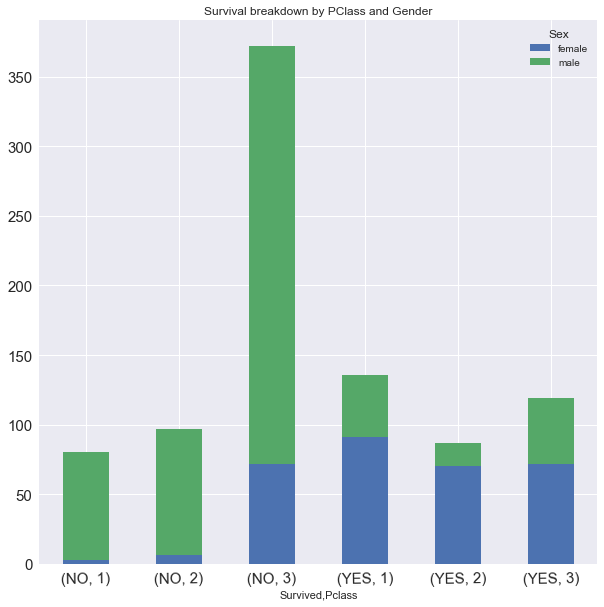

In [134]:
titanic_count_survived_pclass_gender.plot(kind='bar',stacked=True,title='Survival breakdown by PClass and Gender',rot = 1,figsize=(10,10),fontsize=15)
plt.show()

**Key Observation 3:**
         
         more number of femal passengers survived than male passengers. Highest survival if the gender is female and Pclass is 1. Lowest survival if gender is male and Pclass is 3
                  

In [135]:
# group the passengers by survival ,Pclass,gender and Embarked station
titanic_count_survived_pclass_sex_embarked = titanic_df.groupby(['Survived','Pclass','Sex','Embarked'])['PassengerId'].count().unstack()

In [136]:
titanic_count_survived_pclass_sex_embarked

Embarked                Cherburg  Queenstown  Southampton
Survived Pclass Sex                                      
NO       1      female       1.0         NaN          2.0
                male        25.0         1.0         51.0
         2      female       NaN         NaN          6.0
                male         8.0         1.0         82.0
         3      female       8.0         9.0         55.0
                male        33.0        36.0        231.0
YES      1      female      42.0         1.0         46.0
                male        17.0         NaN         28.0
         2      female       7.0         2.0         61.0
                male         2.0         NaN         15.0
         3      female      15.0        24.0         33.0
                male        10.0         3.0         34.0

In [137]:
# fill NaN values
titanic_count_survived_pclass_sex_embarked = titanic_count_survived_pclass_sex_embarked.fillna(0)
titanic_count_survived_pclass_sex_embarked

Embarked                Cherburg  Queenstown  Southampton
Survived Pclass Sex                                      
NO       1      female       1.0         0.0          2.0
                male        25.0         1.0         51.0
         2      female       0.0         0.0          6.0
                male         8.0         1.0         82.0
         3      female       8.0         9.0         55.0
                male        33.0        36.0        231.0
YES      1      female      42.0         1.0         46.0
                male        17.0         0.0         28.0
         2      female       7.0         2.0         61.0
                male         2.0         0.0         15.0
         3      female      15.0        24.0         33.0
                male        10.0         3.0         34.0

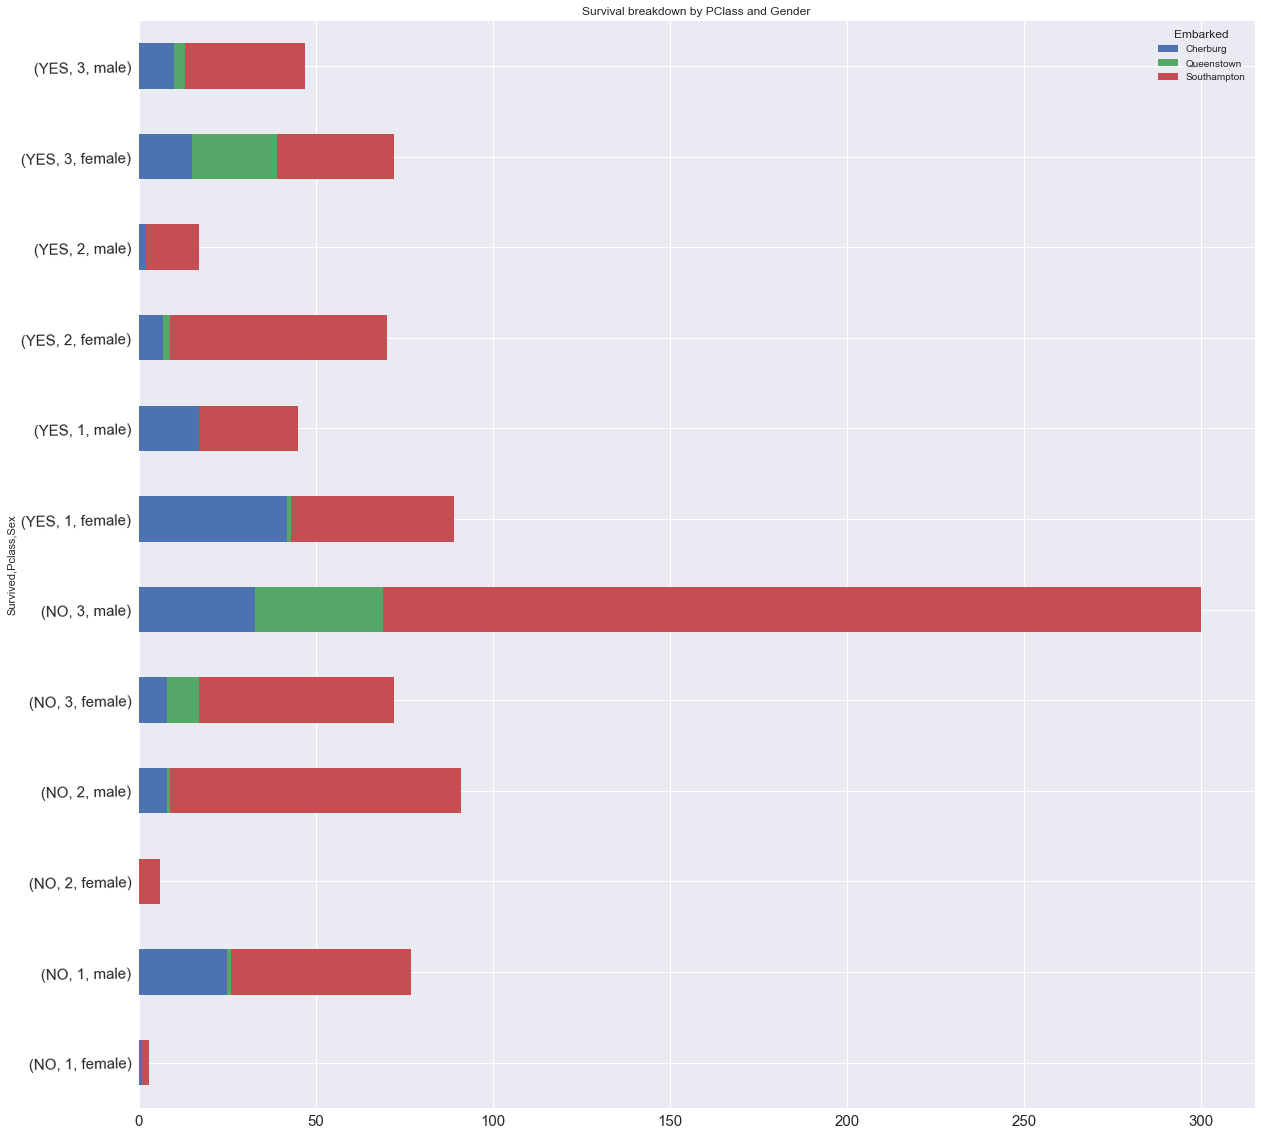

In [138]:
titanic_count_survived_pclass_sex_embarked.plot(kind='barh',stacked=True,title='Survival breakdown by PClass and Gender',rot = 1,figsize=(20,20),fontsize=15)
plt.show()



**Key Observation 4 :**
              
              Southamption station has the maximum number of passengers on boarded and lowest survival.             Many  passengers onboarded at this station belong to Pclass 3. None of the females onboarded at southhampton to Pclass2 survived.
              
              Cherburg has the lowest number of people onboarded and highest survival.Many passengers onboarded  at   this station are female and belong to Pclass1.
              


**Address the null values for Age column **

    Find any criteria associated with the null values.
    
    Update the null values with mean of not null values
    

In [139]:
# count the number of passengers who survived but age is null
# data for survived 
titanic_survived_df  = titanic_df.loc[titanic_df['Survived'] == 'YES']
titanic_survived_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             52
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         2
dtype: int64

In [140]:
# count the number of passengers who did not survived but age is null
# data for not survived 
titanic_not_survived_df = titanic_df.loc[titanic_df['Survived'] == 'NO']
titanic_not_survived_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            125
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          481
Embarked         0
dtype: int64

**Key Observation 5 :**

                Out of 342 surviving passengers 52 passengers do not have Age populated
                
                Out of 549 not surviving passengers 125 passengers do not have Age populated

In [143]:
# update the null values in age column in titanic_df with the mean of not null values

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())


In [151]:
# verify Null values for age in original dataframe
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
# function that return starndard values
def derive_standards(values):
    mean = values.mean()
    std = values.std(ddof=0)
    standards = (values - mean)/std
    return standards

In [156]:
titanic_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


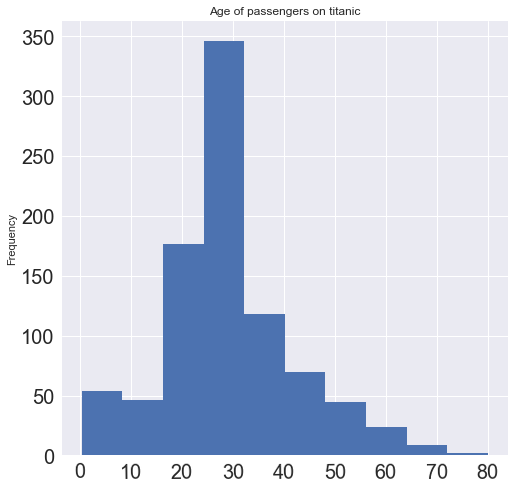

In [165]:
# plot a histogram of age data 
titanic_df['Age'].plot(kind='hist',title='Age of passengers on titanic',rot = 1,figsize=(8,8),fontsize=20)
plt.show()

In [153]:
# derive standard values for age column in titanic_df
titanic_df_standards = derive_standards(titanic_df['Age'])

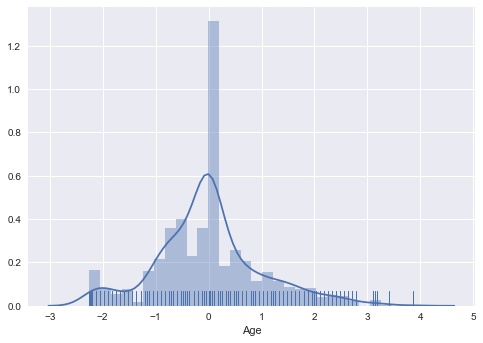

In [157]:
# plot distribution fo standard age values for titanic_df
sns.distplot(titanic_df_standards,hist=True, rug=True)
plt.show()

**Key Observation 6:**

        distribution plot for age column does not represent a bell curve. however it can be observed that majority   of of the passenger in the data set have age range of 25 to 32.few outliers are number of passengers below the      age of 10 and number of passenngers above the age of 75. 

In [161]:
# data for survived passengers only 
survived_titanic_df = titanic_df.loc[titanic_df['Survived'] == 'YES']


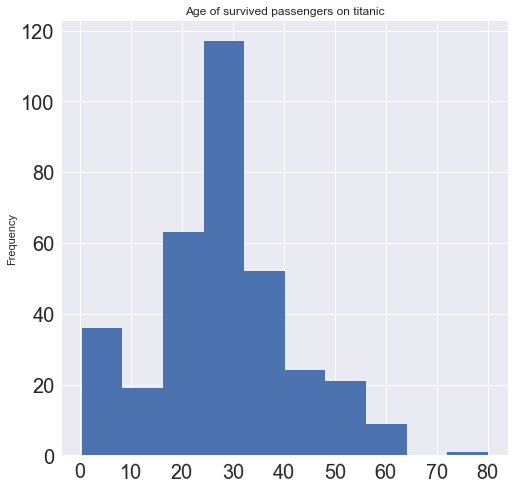

In [175]:
# plot a histogram of age data for survived passengers
survived_titanic_df['Age'].plot(kind='hist',title='Age of survived passengers on titanic',rot = 1,figsize=(8,8),fontsize=20)
plt.show()

In [166]:
# derive standard values for age column in survived_titanic_df
survived_titanic_df_standards = derive_standards(survived_titanic_df['Age'])

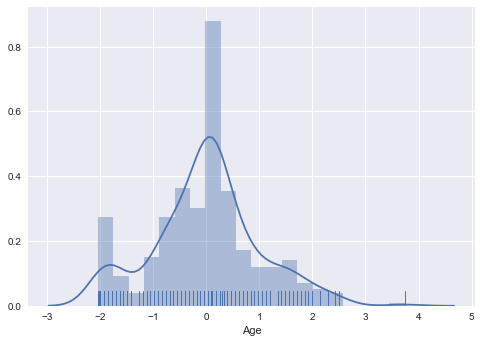

In [168]:
# plot distribution fo standard age values for survived passengers
sns.distplot(survived_titanic_df_standards,hist=True, rug=True)
plt.show()

In [169]:
# data for not survived passengers only 
not_survived_titanic_df = titanic_df.loc[titanic_df['Survived'] == 'NO']


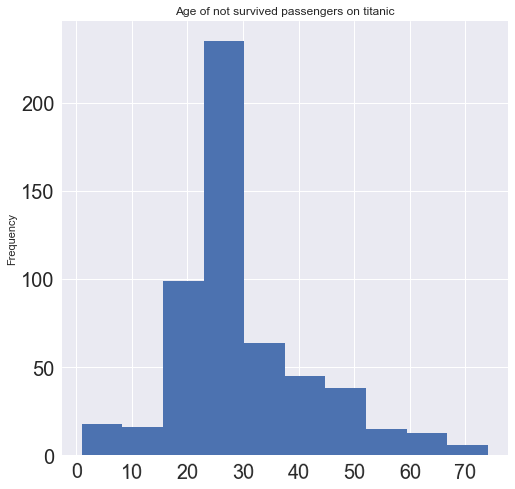

In [177]:
# plot a histogram of age data for not survived passengers
not_survived_titanic_df['Age'].plot(kind='hist',title='Age of not survived passengers on titanic',rot = 1,figsize=(8,8),fontsize=20)
plt.show()

In [178]:
# derive standard values for age column in not_survived_titanic_df
not_survived_titanic_df_standards = derive_standards(not_survived_titanic_df['Age'])

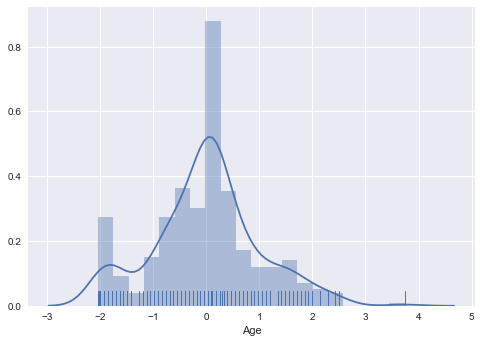

In [179]:
# plot distribution fo standard age values for not survived passengers
sns.distplot(survived_titanic_df_standards,hist=True, rug=True)
plt.show()

** Compare the age distribution between survived and not survived passengers**

![Age of Survived](img/hist_survived.png) Vs ![Age of not Survived](img/hist_not_survived.png)


**Key Observation 7:**

    Median age for the passengers onboarded titanic is in the range of 25 to 32. survival data for the passengers does not represent better survival rate for this age group.
    
    Passengers below the age of 10 and above the age of 70 had better survival rates.
    
    One striking obervation is passengers with age range between 65 to 75 have almost zero survival
    
    
    


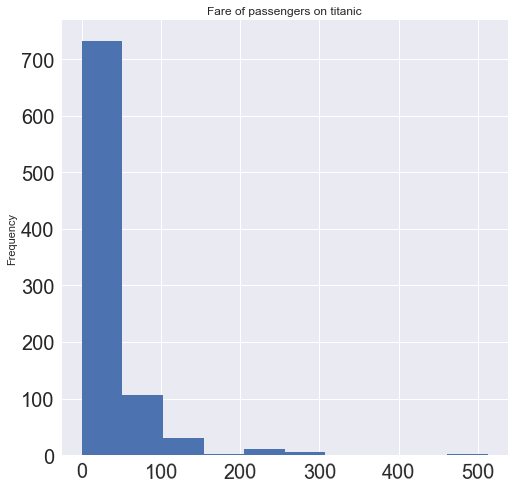

In [186]:
# plot a histogram of Fare data 
titanic_df['Fare'].plot(kind='hist',title='Fare of passengers on titanic',rot = 1,figsize=(8,8),fontsize=20)
plt.show()

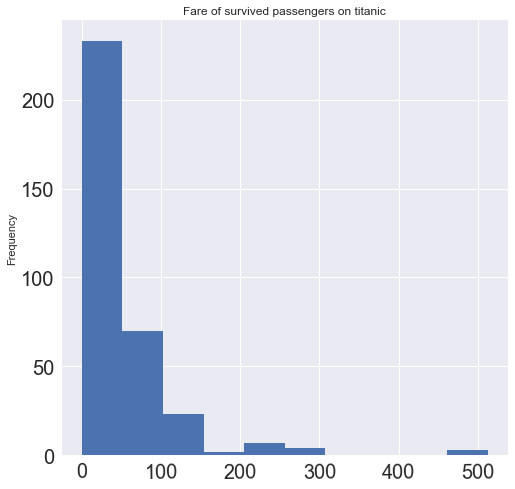

In [187]:
# plot a histogram of Fare data for survived passengers
survived_titanic_df['Fare'].plot(kind='hist',title='Fare of survived passengers on titanic',rot = 1,figsize=(8,8),fontsize=20)
plt.show()

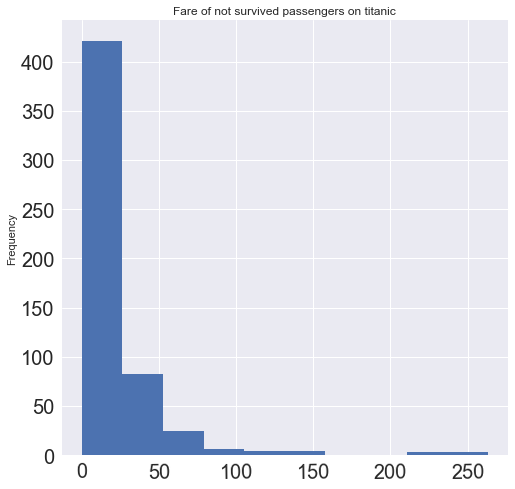

In [188]:
# plot a histogram of Fare data for not survived passengers
not_survived_titanic_df['Fare'].plot(kind='hist',title='Fare of not survived passengers on titanic',rot = 1,figsize=(8,8),fontsize=20)
plt.show()

**Key Observation 8:**

            By comparing the histograms for fare data for survived and not survived passengers,it can be observed that for passengers who paid a fare below 50 have the lowest survival. Passengers who paid the fare above 300 have the highest survival
          

### Limitations:

One of the limitations of the data set is Age data set has many null values. Although these null values have been populated with the mean of the known values, this may effect the quality of the analysis in understanding age as a factor in survival.





### Conclusions:

Above data analysis explores the titanic data set and looks for relationship of passenger survival with passenger Gender, Pclass, Embarked station, Age and Fare.

After looking at the data analysis key observations, it is reasonable to suggest that following factors made passengers more likely to survive.

     - Passengers with Gender: female
     - Passengers boarded on Pclass1
     - Passengers below the age 10 and above the age 75
     - Passengers embarked at Cherburg. These passengers also boarded onto Pclass1 and are female.
     - Passengers who paid a fare of more than ~300. 

